# Project Name- SYRIATEL CUSTOMER CHURN

# 1. Business Understanding

### 1.1 Business Overview

SyriaTel is a communications company that offers mobile and communications services to it's customers. Customer churn refers to a situation where customers stop using company's products or services over a given period. In the telecommunications industry, this often means customers cancel their mobile, internet, or bundled service subscriptions and switch to a competitor.
The business goal is to reduce customer churn, which directly impacts revenue and long-term profitability. By analyzing customer behavior and service usage data, SyriaTel aims to identify customers who are likely to leave and implement proactive strategies to retain them.


### 1.2 Problem Statement

SyriaTel is experiencing a significant number of customers discontinuing their services. Losing customers not only affects immediate revenue but also increases customer acquisition costs. The problem is to identify patterns in customer data that signal a high risk of churn and develop a predictive model to flag such customers before they leave.


### 1.3 Business Objectives

#### Main Objective:
To build a predictive model that accurately identifies customers at risk of churning, allowing the business to take timely retention actions.

#### Specific Objectives:

* To Identify and prioritize the top churn drivers.
* To determine how much revenue is lost due to customer churn.
* To build a baseline model to predict churn with interpretable results.
* To compare and evaluate the performance of different models to determine the most effective.
* To optimize pricing for retention.

### 1.4 Research Questions

* What are the top churn factors driving customer churn?
* How much revenue is lost due to customer churn over a given period?
* Can a baseline machine learning model accurately predict whether a customer will churn?
* Which machine learning model performs best in predicting churn based on classification metrics?
* How does pricing impact customer retention, and what pricing strategies can be implemented to reduce churn without significantly impacting revenue?

### 1.5 Success Criteria

Business Success: Reduction in churn rate, increased retention, and improved customer satisfaction.

Data Mining Success: Accurate predictive model.

# 2. Data Understanding

### 2.1 Dataset Overview
* The dataset is sourced from kaggle https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset.
* The dataset contains historical information about customers which includes their usage patterns and trends and interactions with customer service.
* The target variable is churn, which indicates whether a customer has left the service (1 = Left or 0 = Stayed). 
#### 2.2 Data Quality Checks
 - *Missing Values:* Check for null or missing entries in any column. In SyriaTel there are no missing values.
 - *Data Types:* Ensure numeric columns (e.g., minutes, charges, calls) are of numeric types for correlation and modelling. Convert the churn column to numeric instead of it being float. 
 - *Outliers:* Identify unusually high or low values (e.g, extremely high day minutes) that may affect the model and churn is the Target variable.
#### 2.3 Exploration Insights
* Features like customer service calls, total day charge and total day minutes show a higher correlation with churn, these shows that they are key indicators of potential churn.
* Other usage and billing features have weak correlation but may still contribute when combined in a predictive model.
* Categorical features such as area code are less likely to impact churn individually but may have subtle effects in combination with other variables.


# 3. Data Preparation

## 3.1 Data Cleaning

In the churn prediction dataset, the main tasks include cleaning, transforming, and structuring the data. This is done to check for accuracy, consistency, completeness, uniformity and validity.

#### Loading Dataset

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading our dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
# previewing the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Handling Missing Values
* Checking each column for null or missing values.

In [3]:
# checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values.

#### Handling duplicated values
Checking each column for duplicated values and according to our data there are no duplicate values.

In [4]:
# checking for duplicates
data.duplicated().sum()

0

#### Checking for Outliers

<Axes: ylabel='total day minutes'>

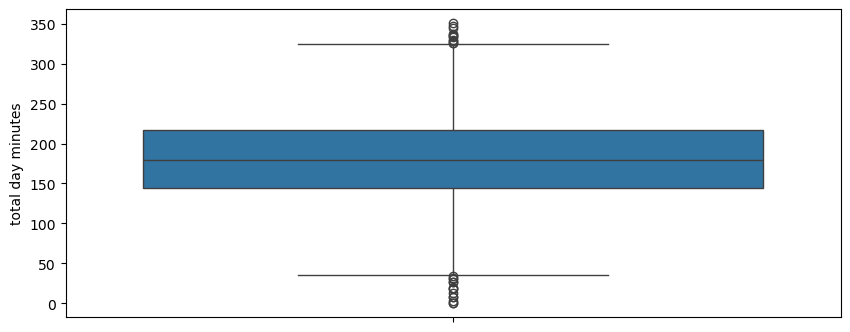

In [5]:
# Checking for outliers.
plt.figure(figsize=(10,4))
sns.boxplot(data['total day minutes'])

<Axes: ylabel='account length'>

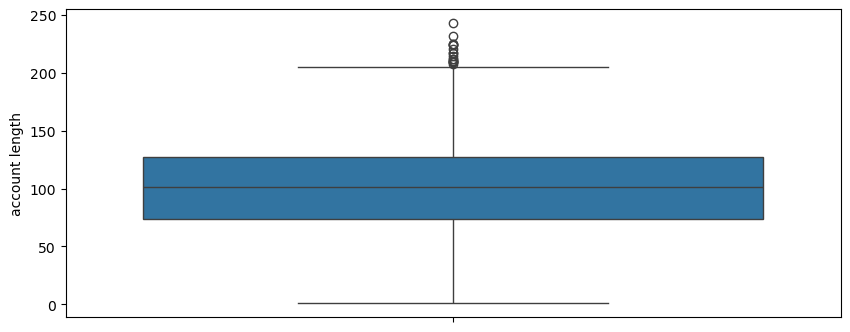

In [6]:
plt.figure(figsize=(10,4))
sns.boxplot(data['account length'])

<Axes: ylabel='total eve charge'>

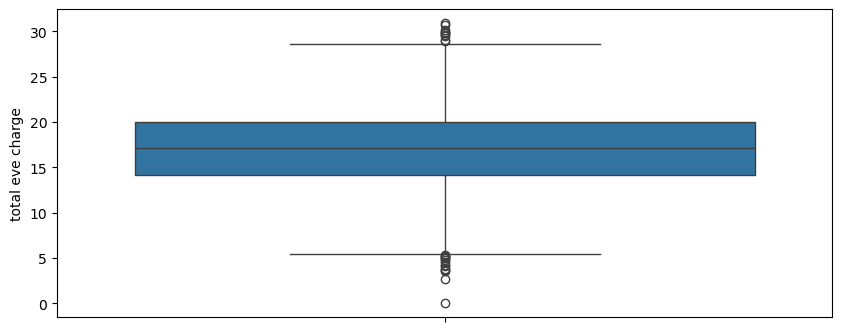

In [7]:
plt.figure(figsize=(10,4))
sns.boxplot(data['total eve charge'])

There were outliers detected but we did not remove them being that they were true entries.

#### Converting Data types

In [8]:
# data type of each column in the DataFrame.
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

* Convert data type(churn) from boolean to integers(int64) since machine learning algorithms such as logistic regression expect numeric input and output.

In [9]:
data['churn'] = data['churn'].astype('int64')

In [10]:
# check data type again to ensure it has been changed
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [11]:
# Shows the structure of the data set
data.shape

(3333, 21)

# Exloratory Data Analysis(EDA)

In [12]:
# Generate summary statistics for the columns in the DataFrame.
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### Target Variable Analysis

In [13]:
# checking for class distribution
data["churn"].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

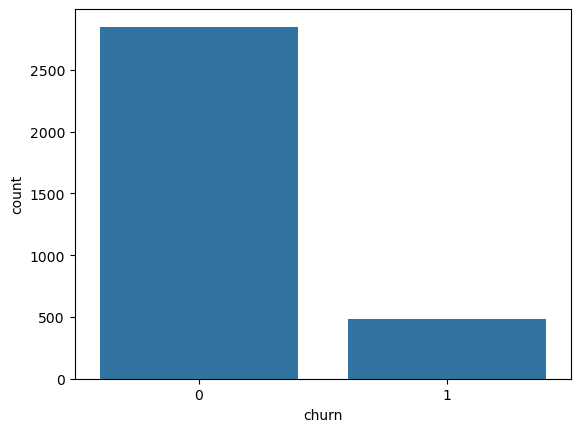

In [14]:
# visualizing class distribution
sns.countplot(x= "churn", data=data)

#### Interpretation of Churn Distribution

### Target Variable: Churn Distribution

**Total customers:** 3,333  
- **Stayed (0):** 2,850 (~85.5%)  
- **Churned (1):** 483 (~14.5%)  

---
###  What This Means
- The dataset is **imbalanced** — only ~14.5% of customers churned.  
- If we naïvely predict **“no churn” for everyone**, we’d achieve ~85% accuracy.  
  - This shows that **accuracy alone is misleading** in imbalanced datasets.  
---

###  Implications for Modeling
- For a **baseline Logistic Regression** model, we must:  
  - Look **beyond accuracy** → focus on **precision, recall, F1-score, and ROC-AUC**.  
  - Apply **class weights** (`class_weight='balanced'` in sklearn) to give churned customers more importe.  

---

###  Business Insight
- SyriaTel’s churn rate is ~**15%**, which is significant.  
- Retaining even a **small fraction** of these churned customers could translate into **millions in saved revenue**.  

---

## Categorical Features vs Churn

In [15]:
# identifying categorical columns
cat_features= data.select_dtypes(include=["object", "category"]).columns
cat_features

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

#### Partial imbalance
* Checking for dominant categories, which is useful for spotting imbalance before modeling.

In [16]:
data.describe(include=['object']).T[['top', 'freq']]

,top,freq
state,WV,106
phone number,382-4657,1
international plan,no,3010
voice mail plan,no,2411


State, international plan and voice mail plan are imbalanced.
We will drop phone number as it is not useful for modelling.

In [17]:
cat_features = cat_features.drop(['state','phone number'])

In [18]:
cat_features

Index(['international plan', 'voice mail plan'], dtype='object')

- Customers with **international plans** may churn differently due to higher costs.
- Customers with **voice mail plans** may behave differently depending on usage.

We will compare churn rates across these categorical variables.


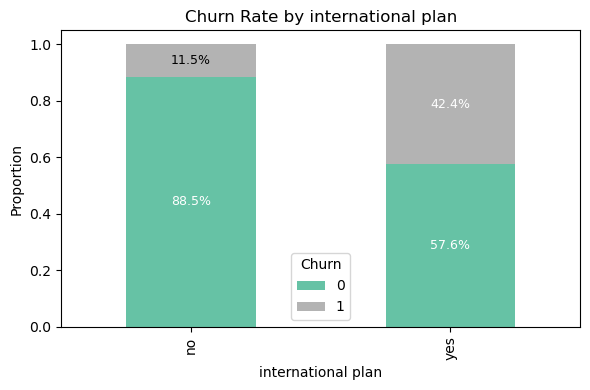

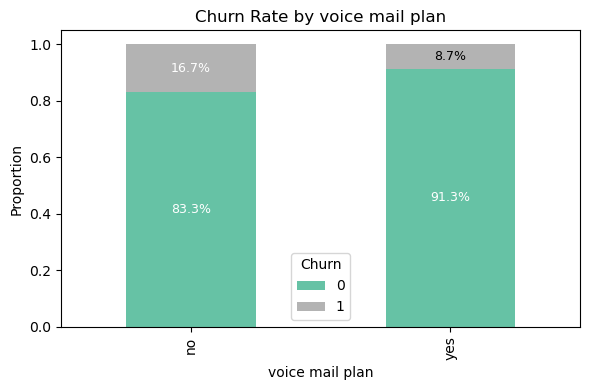

In [19]:
cat_features = ['international plan', 'voice mail plan']

for feature in cat_features:
    churn_rate = pd.crosstab(data[feature], data['churn'], normalize='index')
    ax = churn_rate.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')
    
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Proportion')
    plt.ylim(0, 1.05)  # Slightly above 1 to make room for labels

    # Annotate each bar segment
    for i, category in enumerate(churn_rate.index):
        cumulative = 0
        for j, churn_status in enumerate(churn_rate.columns):
            value = churn_rate.loc[category, churn_status]
            cumulative += value
            ax.text(
                i,                      # x-position
                cumulative - value / 2, # y-position (middle of the bar segment)
                f'{value:.1%}',         # label text
                ha='center', va='center',
                fontsize=9, color='white' if value > 0.15 else 'black'
            )

    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

#### observation

1. **57.6%** of the Customers with the International plan are reportedly  not churning , while 42.4%  churn

2. Customers with No International plan record **11.5%** churn Rate while **88.5%** do not churn


3. Under Voice mail plan , customers with voice mail plan record **91.3%** non-churners , while ones with No voice mail plan record **16.7%** churn rate
 

#### CHURN COUNTS IN CATEGORICAL VARIABLES

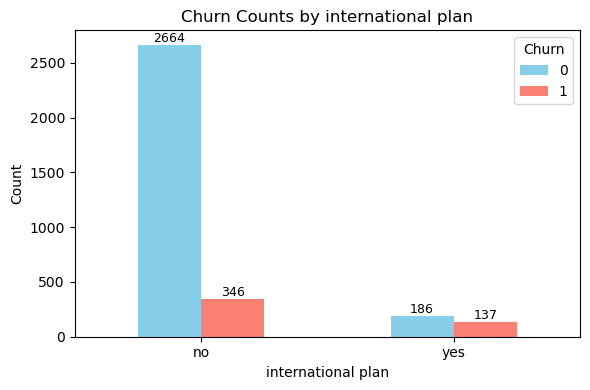

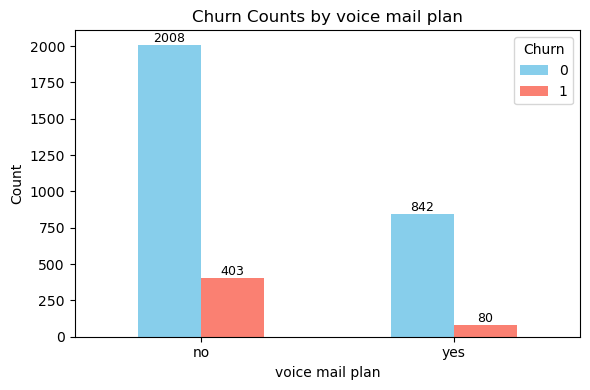

In [20]:
cat_features = ['international plan', 'voice mail plan']

for feature in cat_features:
    churn_counts = pd.crosstab(data[feature], data['churn'])
    
    # Create the plot and capture the axis
    ax = churn_counts.plot(kind='bar', figsize=(6, 4), color=['skyblue', 'salmon'])
    
    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
    
    # Final touches
    plt.title(f'Churn Counts by {feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()


#### CUSTOMER CALLS VS CHURN

Uncovering the relationship between number of customer calls made and churn 

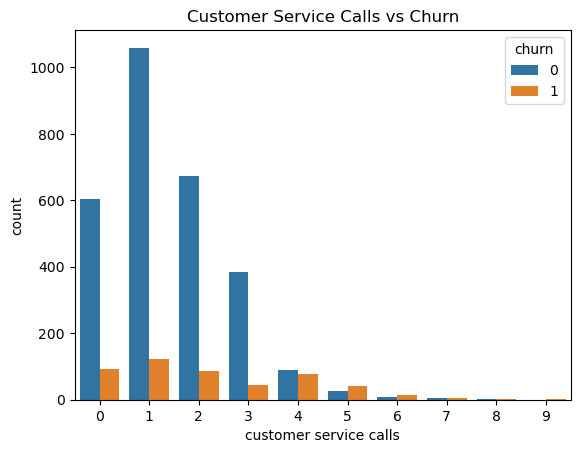

In [21]:
sns.countplot(x="customer service calls", hue="churn", data=data)
plt.title("Customer Service Calls vs Churn")
plt.show()

##### 

1. As the number of service calls increases, the count of non-churners remains relatively high up to around 2–3 calls, but churners rise proportionally with higher call counts (orange bars grow relative to blue in the 1–3 call range).
   
2. For higher numbers of calls (≥4), both churn and non-churn counts drop, but churners (orange) may appear slightly more frequent than in the 0–2 range, suggesting a potential association between more service calls and churn risk.


### Numeric Features vs Churn

We now analyze numeric features such as:
- Total day minutes, eve minutes, night minutes, intl minutes
- Total day calls, eve calls, night calls, intl calls
- Customer service calls

For each feature we will:
1. Compare the mean values across churn vs non-churn groups.
2. Plot the distributions.
3. Provide an interpretation highlighting whether churners use more/less of the service.


In [22]:
num_features = data.select_dtypes(include=['number']).columns
num_features

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [23]:
num_features= num_features.drop('area code')

In [24]:
num_features

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


=== ACCOUNT LENGTH ===
Mean values by churn group:
churn
0    100.79
1    102.66
Name: account length, dtype: float64


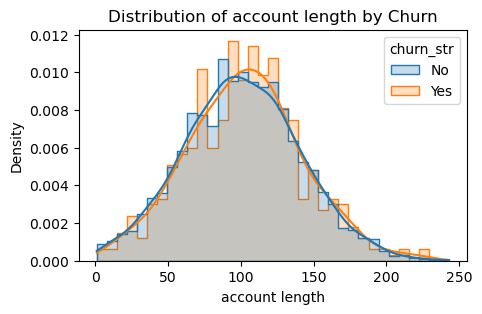

➡ Churners have HIGHER average account length (102.66) compared to non-churners (100.79).

=== NUMBER VMAIL MESSAGES ===
Mean values by churn group:
churn
0    8.60
1    5.12
Name: number vmail messages, dtype: float64


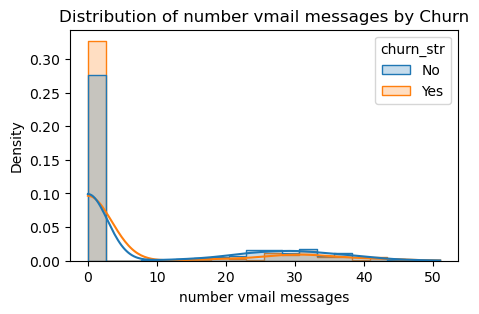

➡ Churners have LOWER average number vmail messages (5.12) compared to non-churners (8.6).

=== TOTAL DAY MINUTES ===
Mean values by churn group:
churn
0    175.18
1    206.91
Name: total day minutes, dtype: float64


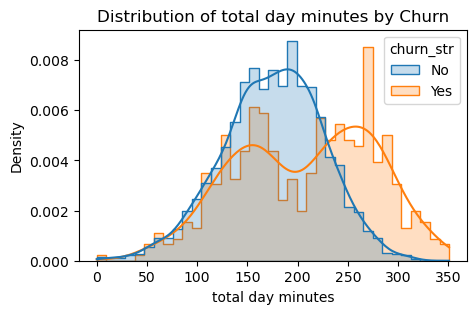

➡ Churners have HIGHER average total day minutes (206.91) compared to non-churners (175.18).

=== TOTAL DAY CALLS ===
Mean values by churn group:
churn
0    100.28
1    101.34
Name: total day calls, dtype: float64


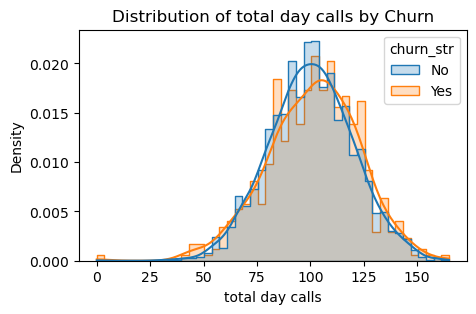

➡ Churners have HIGHER average total day calls (101.34) compared to non-churners (100.28).

=== TOTAL DAY CHARGE ===
Mean values by churn group:
churn
0    29.78
1    35.18
Name: total day charge, dtype: float64


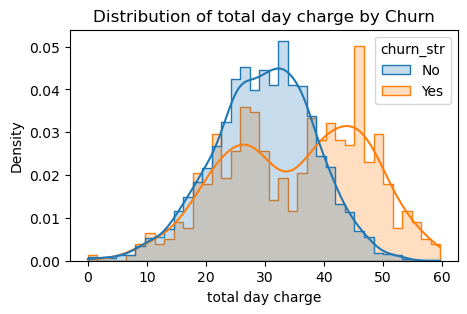

➡ Churners have HIGHER average total day charge (35.18) compared to non-churners (29.78).

=== TOTAL EVE MINUTES ===
Mean values by churn group:
churn
0    199.04
1    212.41
Name: total eve minutes, dtype: float64


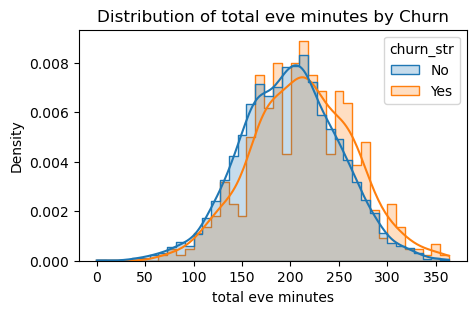

➡ Churners have HIGHER average total eve minutes (212.41) compared to non-churners (199.04).

=== TOTAL EVE CALLS ===
Mean values by churn group:
churn
0    100.04
1    100.56
Name: total eve calls, dtype: float64


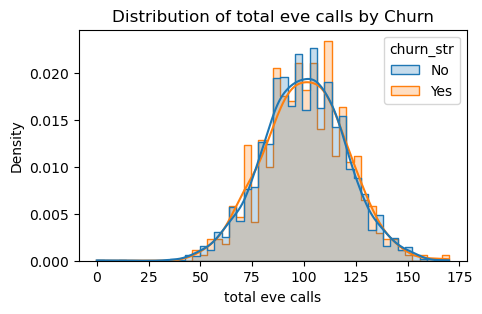

➡ Churners have HIGHER average total eve calls (100.56) compared to non-churners (100.04).

=== TOTAL EVE CHARGE ===
Mean values by churn group:
churn
0    16.92
1    18.05
Name: total eve charge, dtype: float64


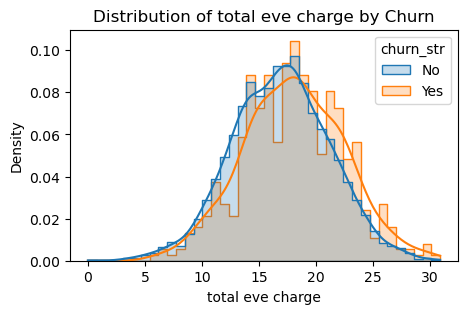

➡ Churners have HIGHER average total eve charge (18.05) compared to non-churners (16.92).

=== TOTAL NIGHT MINUTES ===
Mean values by churn group:
churn
0    200.13
1    205.23
Name: total night minutes, dtype: float64


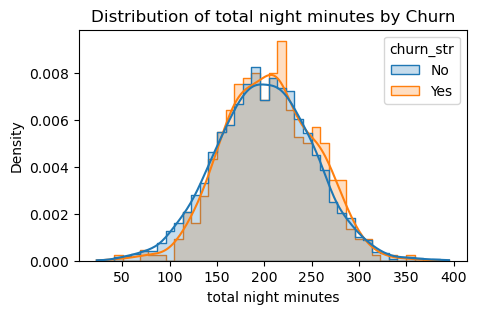

➡ Churners have HIGHER average total night minutes (205.23) compared to non-churners (200.13).

=== TOTAL NIGHT CALLS ===
Mean values by churn group:
churn
0    100.06
1    100.40
Name: total night calls, dtype: float64


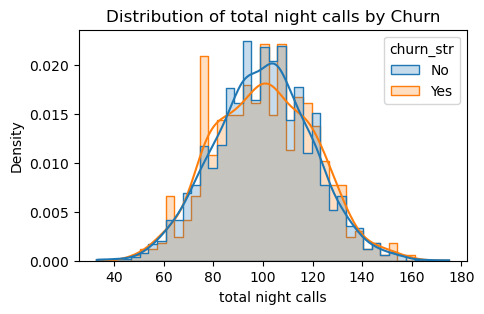

➡ Churners have HIGHER average total night calls (100.4) compared to non-churners (100.06).

=== TOTAL NIGHT CHARGE ===
Mean values by churn group:
churn
0    9.01
1    9.24
Name: total night charge, dtype: float64


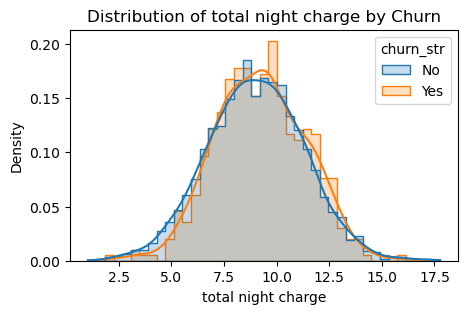

➡ Churners have HIGHER average total night charge (9.24) compared to non-churners (9.01).

=== TOTAL INTL MINUTES ===
Mean values by churn group:
churn
0    10.16
1    10.70
Name: total intl minutes, dtype: float64


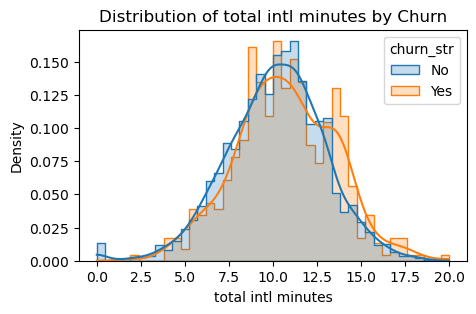

➡ Churners have HIGHER average total intl minutes (10.7) compared to non-churners (10.16).

=== TOTAL INTL CALLS ===
Mean values by churn group:
churn
0    4.53
1    4.16
Name: total intl calls, dtype: float64


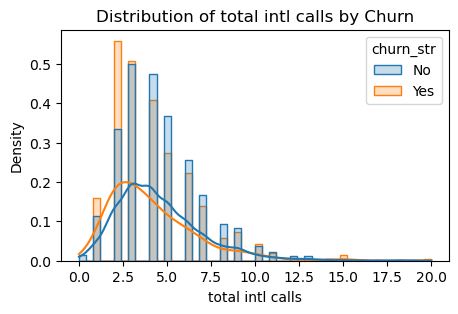

➡ Churners have LOWER average total intl calls (4.16) compared to non-churners (4.53).

=== TOTAL INTL CHARGE ===
Mean values by churn group:
churn
0    2.74
1    2.89
Name: total intl charge, dtype: float64


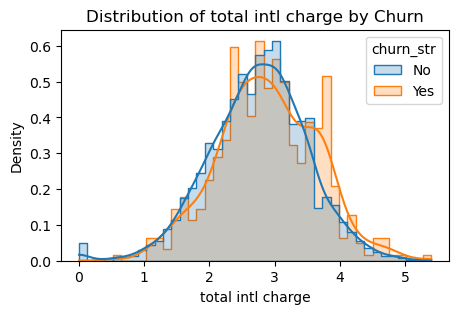

➡ Churners have HIGHER average total intl charge (2.89) compared to non-churners (2.74).

=== CUSTOMER SERVICE CALLS ===
Mean values by churn group:
churn
0    1.45
1    2.23
Name: customer service calls, dtype: float64


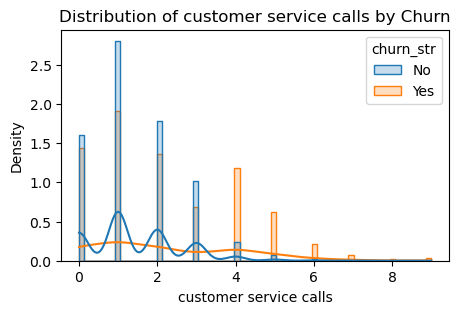

➡ Churners have HIGHER average customer service calls (2.23) compared to non-churners (1.45).

=== CHURN ===
Mean values by churn group:
churn
0    0.0
1    1.0
Name: churn, dtype: float64


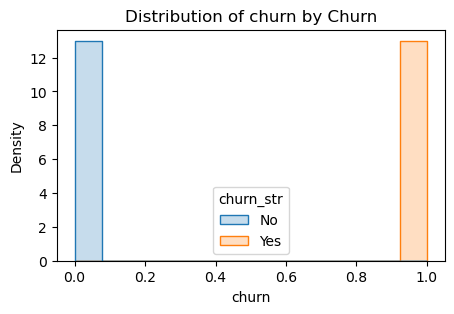

➡ Churners have HIGHER average churn (1.0) compared to non-churners (0.0).


In [25]:
data['churn_str'] = data['churn'].map({0: 'No', 1: 'Yes'})

for col in num_features:
    print(f"\n=== {col.upper()} ===")
    
    # Mean comparison
    means = data.groupby('churn')[col].mean().round(2)
    print("Mean values by churn group:")
    print(means)
    
    # Plot distribution
    plt.figure(figsize=(5,3))
    sns.histplot(data=data, x=col, hue='churn_str', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f"Distribution of {col} by Churn")
    plt.show()
    
    # Text interpretation
    churn_val = means[1]
    no_churn_val = means[0]
    
    if churn_val > no_churn_val:
        print(f"➡ Churners have HIGHER average {col} ({churn_val}) compared to non-churners ({no_churn_val}).")
    else:
        print(f"➡ Churners have LOWER average {col} ({churn_val}) compared to non-churners ({no_churn_val}).")

Day usage is a strong churn signal

Churners use more day minutes (206.9 vs 175.2) and slightly more day calls.

 They might face higher bills during the day, leading to dissatisfaction.

Eve & Night usage

Churners also have higher eve minutes (212.4 vs 199.0) and higher night minutes (205.2 vs 200.1).

 Suggests churners are generally heavier users overall.

International usage

Churners use more intl minutes (10.7 vs 10.2) but make fewer intl calls (4.16 vs 4.53).

 They talk longer per call internationally, which might increase costs, contributing to churn.

Customer service calls (very strong indicator)

Churners average 2.23 calls vs non-churners 1.45 calls.

 This is a clear red flag — unhappy customers call more, and are more likely to churn.

---

### Feature correlation Analysis

We've used numeric columns only to avoid conversion errors

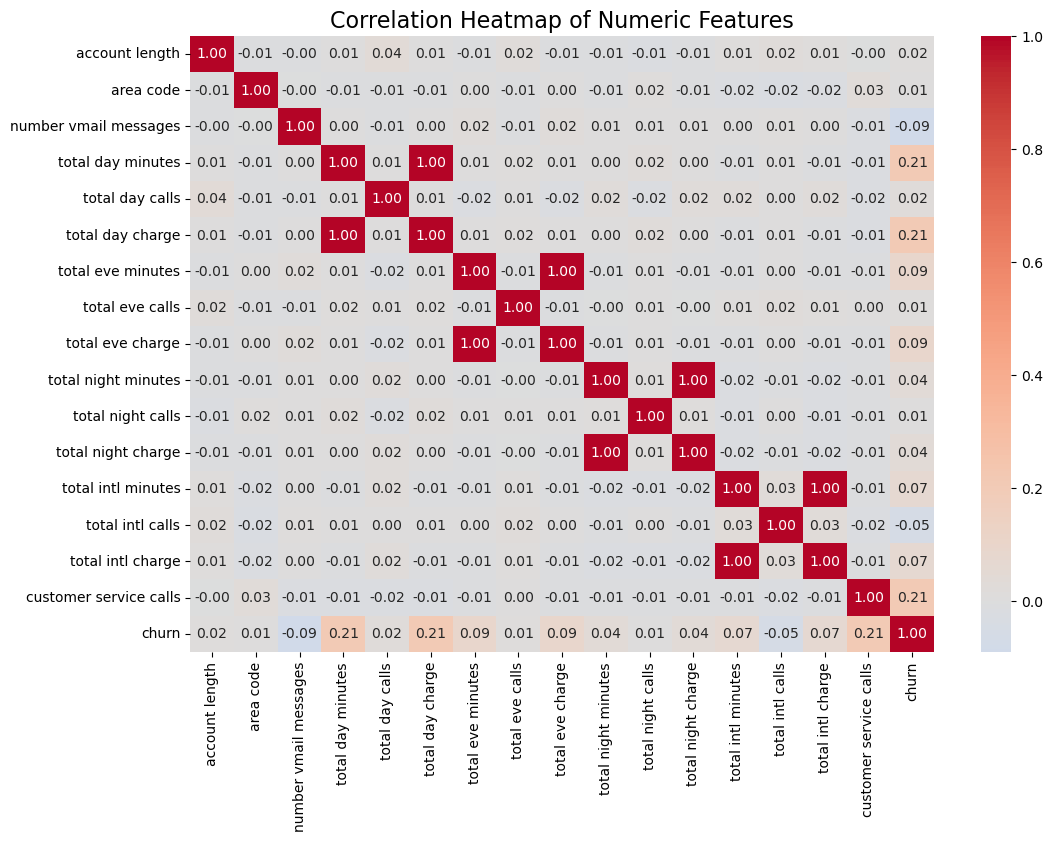

Correlation of Features with Churn:
 churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


In [26]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Compute correlations
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

# Correlation with churn
corr_with_churn = corr['churn'].sort_values(ascending=False)
print("Correlation of Features with Churn:\n", corr_with_churn)


We computed the **Pearson correlations** between all numeric features and the churn variable.  

Key findings:

1. **Strongest Positive Correlations**  
   - `customer service calls` → **0.209**  
   - `total day minutes` / `total day charge` → **0.205**  
    Customers who call support more often or use more day minutes are more likely to churn.  

2. **Moderate Positive Correlations**  
   - `total eve minutes` / `total eve charge` → **~0.093**  
   - `intl minutes` / `intl charge` → **~0.068**  
    Heavier usage (especially international calls) increases churn probability, though not as strongly.  

3. **Weak/Negligible Correlations**  
   - `night minutes/charge`, `day calls`, `account length`, `area code`, etc. → **< 0.04**  
    These features have little direct relationship with churn.  

4. **Negative Correlations**  
   - `intl calls` → **-0.053**  
   - `number vmail messages` → **-0.090**  
    More international calls and more voicemail messages are slightly associated with **lower churn**.  

 **Overall takeaway:**  
- The most important signals of churn are; customer service calls, total day minutes and total day charge since they are highly correlated.

---


### Calculating amount lost due to churn

In [27]:
# calculating the total revenue
data['total_charges'] = (
    data['total day charge'] +
    data['total eve charge'] +
    data['total night charge'] +
    data['total intl charge']
)

In [28]:
# The revenue that the company gets in total
data['total_charges'].sum()

198146.03

In [29]:
# calculating the total revenue lost due to churn
revenue_lost = data.loc[data['churn'] == 1, 'total_charges'].sum()
revenue_lost

31566.93

In [30]:
data['total_charges'].sum() - revenue_lost

166579.1

* The company is losing 31,566 due to churn

In [31]:
#total revenue by state
state_revenue = data.groupby('state')['total_charges'].sum().sort_values(ascending=False)

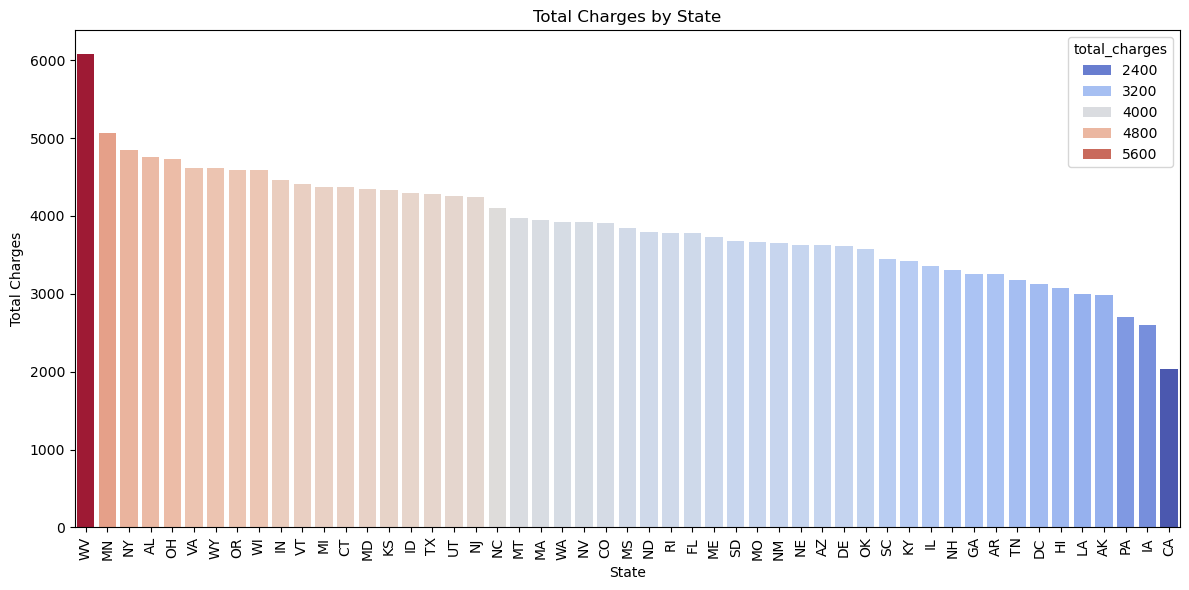

In [32]:
# visualizing total revenue by state 
plt.figure(figsize=(12, 6))
sns.barplot(x=state_revenue.index,
            y=state_revenue.values,
            hue= state_revenue,
            palette='coolwarm'
           )

plt.xticks(rotation=90)
plt.title('Total Charges by State')
plt.xlabel('State')
plt.ylabel('Total Charges')
plt.tight_layout()
plt.show()


In [33]:
# counting the number of records in each group and getting the summary statistics of the 2 groups
data.groupby('churn')['customer service calls'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2850.0,1.449825,1.163883,0.0,1.0,1.0,2.0,8.0
1,483.0,2.229814,1.853275,0.0,1.0,2.0,4.0,9.0


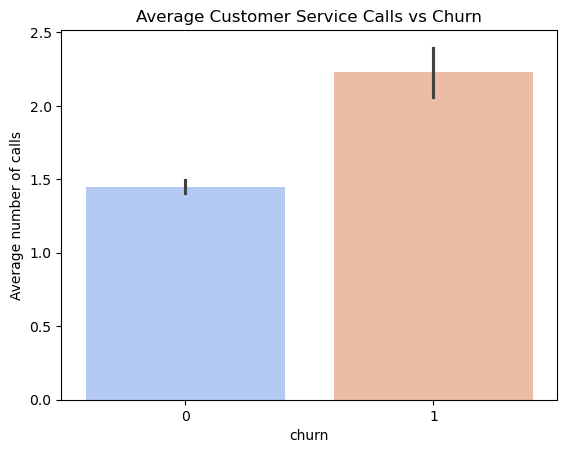

In [34]:
# visualizing churn vs customer service calls
sns.barplot(x= "churn",
           y= "customer service calls",
           data= data,
           hue= "churn",
           palette= "coolwarm",
           legend= False
           )
plt.title("Average Customer Service Calls vs Churn")
plt.ylabel("Average number of calls")
plt.show()

* Customers who churn make more calls compared to those who don't indicating that they are dissatisfied with some service. This could be an early sign  that the customers are going to churn.

#### ANALYZING CHURN BY STATE 

1. **Spot CHURN hotspots** : Identify States with unusually high churn rates

2. **Targeted Interventions**: Customize offers or support based on regional trends
in low churn areas


3.**Business Strategy**:  Allocate resources to high-risk areas or expand 

#### Top 5 State with Highest Churn Rate

In [35]:
# Calculate churn rate by state and select TOP 5
churn_by_state = data.groupby('state')['churn'].mean().sort_values(ascending=False).head(5)
print(churn_by_state)

state
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
Name: churn, dtype: float64


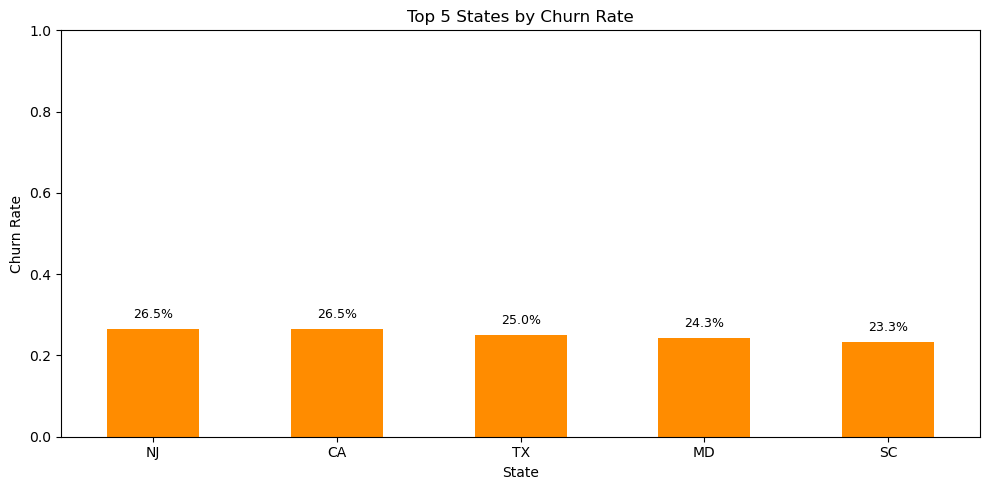

In [36]:
# Calculate churn rate by state and select top 5
churn_by_state = data.groupby('state')['churn'].mean().sort_values(ascending=False).head(5)

# Plot
ax = churn_by_state.plot(kind='bar', figsize=(10, 5), color='darkorange')
plt.title('Top 5 States by Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('State')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Keep scale consistent

# Add percentage labels
for i, value in enumerate(churn_by_state):
    ax.text(i, value + 0.02, f'{value:.1%}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


#### 

1. NJ-(New Jersy) - 26.5%
2. CA - (California) - 26.5%
3. TX (Texas) - 25%
4. MD (Maryland) - 24.3%
5. SC - (South Carolina) - 23.3%

These states represent geographical risk zones where customer dissatisfaction or competitive pressure may be high, they require retention strategies to mitigate the high rates of customer churn. 

#### 5 STATES WITH LOWEST CHURN RATE

In [37]:
# Calculate churn rate by state and select LEAST 5
churn_by_state = data.groupby('state')['churn'].mean().sort_values(ascending=False).tail(5)
print(churn_by_state)

state
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64


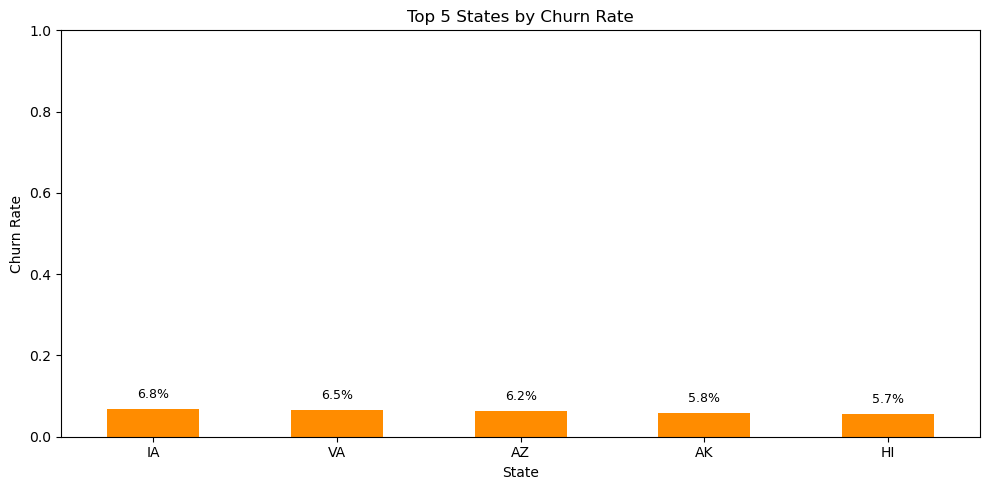

In [38]:
# Calculate churn rate by state and select LEAST 5
churn_by_state = data.groupby('state')['churn'].mean().sort_values(ascending=False).tail(5)

# Plot
ax = churn_by_state.plot(kind='bar', figsize=(10, 5), color='darkorange')
plt.title('Top 5 States by Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('State')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Keep scale consistent

# Add percentage labels
for i, value in enumerate(churn_by_state):
    ax.text(i, value + 0.02, f'{value:.1%}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

####

1. IA → Iowa -6.8%
2. VA → Virginia  = 6.5%
3. AZ → Arizona  = 6.2%
4. AK → Alaska   = 5.8%
5. HI → Hawaii  = 5.7%

These states report the lowest customer churn rates 

## Data Preprocessing

### Data Splitting

In [39]:
# Importing the necessary libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score,  accuracy_score, precision_score, recall_score, f1_score, classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE

# Drop non-numeric categorical columns and separate features and target
X = data.drop(columns=['churn', 'phone number', 'state','churn_str', 'total_charges'], axis=1)
y = data['churn']

# Encode yes/no categorical variables
X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})

# One-hot encode area code
X = pd.get_dummies(X, columns=['area code'], drop_first=True)

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape, y_train.shape

((2666, 19), (2666,))

In [42]:
X_test.shape, y_test.shape

((667, 19), (667,))

### Feature scaling

In [43]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Check the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

Class distribution before SMOTE: Counter({0: 2284, 1: 382})


In [45]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [46]:
# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution after SMOTE: Counter({0: 2284, 1: 2284})


# Modeling

In [47]:
# Logistic Regression Baseline Model
# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_res, y_train_res)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation

In [48]:
# Evaluation

print("Model Evaluation Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Results:
Accuracy: 0.7841
Precision: 0.3920
Recall: 0.7723
F1-Score: 0.5200

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.77      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667



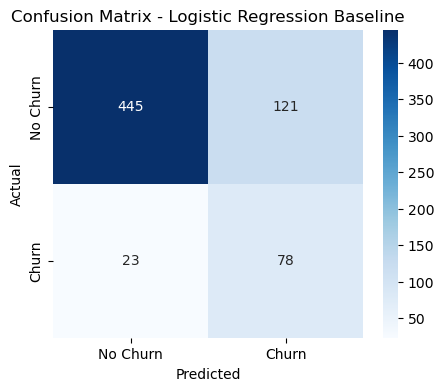


Top Features influencing churn:
customer service calls    0.904450
international plan        0.710023
number vmail messages     0.423467
total day charge          0.386073
total day minutes         0.385803
total eve minutes         0.169312
total eve charge          0.167574
total intl charge         0.134703
total intl minutes        0.128189
total night minutes       0.105251
dtype: float64

Features reducing churn likelihood:
voice mail plan       -0.840642
total intl calls      -0.298245
total night calls     -0.024585
area code_415         -0.024154
total day calls        0.013124
total eve calls        0.057288
area code_510          0.065380
account length         0.080675
total night charge     0.101860
total night minutes    0.105251
dtype: float64


In [49]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Baseline')
plt.show()

# Feature Importance (coefficients)
feature_importance = pd.Series(log_reg.coef_[0], index=X.columns)
print("\nTop Features influencing churn:")
print(feature_importance.sort_values(ascending=False).head(10))
print("\nFeatures reducing churn likelihood:")
print(feature_importance.sort_values().head(10))

# DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree
dtree = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight="balanced")  
dtree.fit(X_train, y_train)

# Predictions
y_pred_dt = dtree.predict(X_test)
y_pred_proba_dt = dtree.predict_proba(X_test)[:, 1]

In [51]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_dt))

Confusion Matrix:
 [[549  17]
 [ 20  81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.83      0.80      0.81       101

    accuracy                           0.94       667
   macro avg       0.90      0.89      0.89       667
weighted avg       0.94      0.94      0.94       667

ROC AUC: 0.8960483504180807


The decision tree model achieved an accuracy of 94%, which means it predicts churn correctly most of the time.

For non-churners, the model is very strong, with 97% recall. So almost all loyal customers are identified correctly.

For churners, the recall is 80% which is good but shows the model sometimes misses customers who are about to leave.

The ROC AUC score is ~0.90, which is excellent. It shows the model can distinguish churners from non-churners very well.

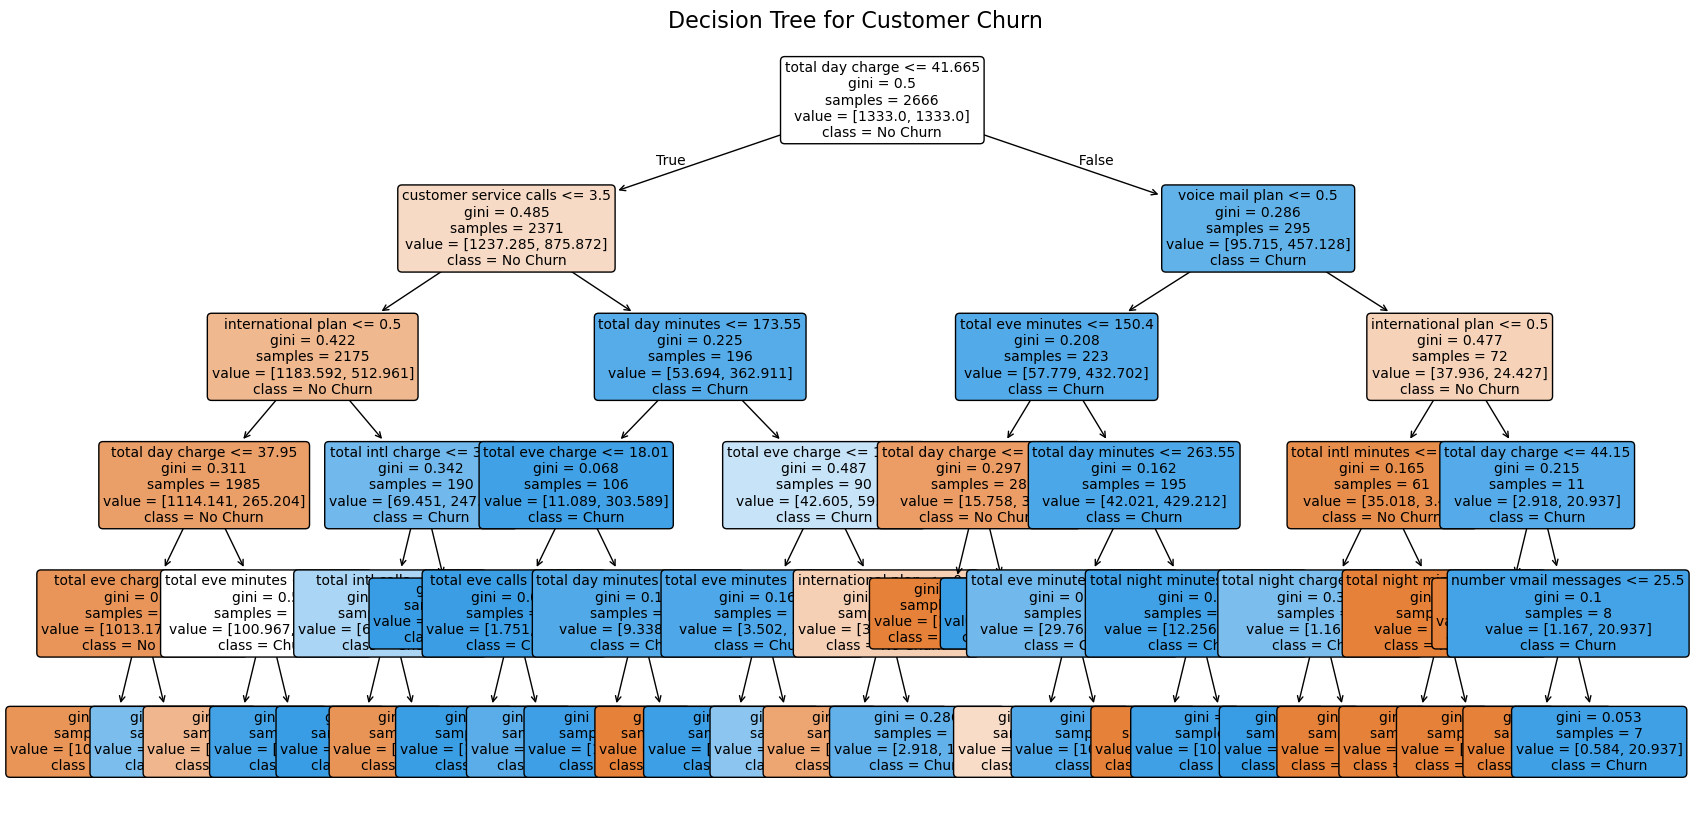

In [52]:
# Plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dtree, 
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Customer Churn", fontsize=16)
plt.show()

The top split in the tree is the total day charge, showing it is the strongest factor influencing churn.

Customer service calls are also highly important. Customers making more than 3 to 4 calls are much more likely to churn likely due to unresolved issues or dissatisfaction.

Having an international plan increases the chance of churn compared to customers without it.

Fewer voicemail messages combined with higher evening and night usage is another churn indicator.

Overally, churn risk is highest for customers with high day charges, frequent service calls and an international plan while those with moderate usage, fewer service calls and no international plan are less likely to churn.

### Hyperparameter Tuning for Decision Tree

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [3, 5, 10, None],     # Limit the tree depth (to prevent overfitting)
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],    # Minimum samples in each leaf node
    'class_weight': ['balanced']       
}

# Grid search for Decision Tree
dtree_tuned = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt, cv=5, scoring='f1', n_jobs=-1
)

dtree_tuned.fit(X_train, y_train)

print("Best parameters:", dtree_tuned.best_params_)
print("Best F1 Score:", dtree_tuned.best_score_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best F1 Score: 0.7095452062335563


In [54]:
# Test the best model
best_dtree = dtree_tuned.best_estimator_

# Predictions on test set
y_pred_best_dt = best_dtree.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_dt))
print("ROC AUC:", roc_auc_score(y_test, best_dtree.predict_proba(X_test)[:,1]))

Confusion Matrix:
 [[543  23]
 [ 19  82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       566
           1       0.78      0.81      0.80       101

    accuracy                           0.94       667
   macro avg       0.87      0.89      0.88       667
weighted avg       0.94      0.94      0.94       667

ROC AUC: 0.9040688521148934


Out of 101 customers who actually churned, the model correctly identified 82 of them (81% recall), which is very good. It only missed 19 churners, meaning the company can act on most customers before they leave.

Precision (78%): When the model predicts churn, it’s right most of the time.

Recall (81%): It catches 8 out of 10 actual churners.

F1 Score (0.80): A good balance between catching churners and avoiding false alarms.

Accuracy (94%): Very high, but recall and F1 are more important here because churn is imbalanced.

ROC AUC (0.90): Excellent ability to separate churners from non-churners (anything above 0.85 is considered strong)

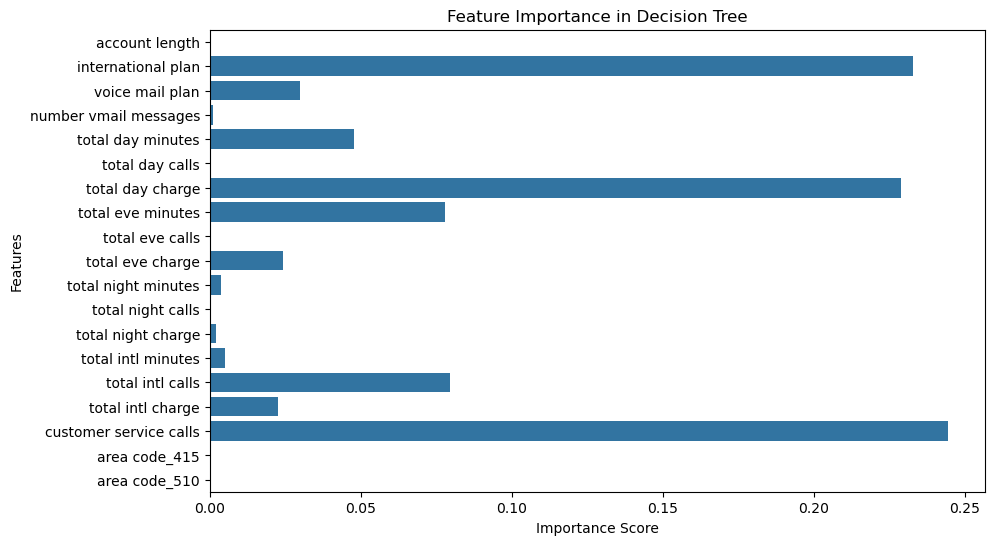

In [55]:
# Feature importance visualization
importances = dtree.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# RandomForestClassifier

In [56]:

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, min_samples_leaf = 10,  class_weight="balanced" )

rf_model.fit(X_train, y_train)

# check for churn probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Apply lower threshold 

threshold = 0.5
y_pred_thresh = (y_proba >= threshold).astype(int)


# Test for  Accuracy score
accuracy = accuracy_score(y_test, y_pred_thresh)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Detailed performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred_thresh))

#  Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))


Random Forest Accuracy: 0.9415

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       566
           1       0.79      0.83      0.81       101

    accuracy                           0.94       667
   macro avg       0.88      0.90      0.89       667
weighted avg       0.94      0.94      0.94       667


Confusion Matrix:
[[544  22]
 [ 17  84]]


The Random Forest model is highly accurate, correctly predicting outcomes 94% of the time.

When it predicts that a customer will churn, it’s right about 8 out of 10 times (precision = 79%).

It successfully identifies 83% of actual churners, which is slightly better than the Decision Tree (81%).

Its overall balance between catching churners and avoiding false alarms is strong (F1 = 0.81).

Looking at the confusion matrix:

- 544 loyal customers were correctly recognized, while 22 were mistakenly flagged as churn.

- Out of the churners, 84 were correctly identified, and only 17 were missed.

- Overally, the model is very reliable at spotting customers likely to leave, while keeping mistakes fairly low.

# Conclusion


## Retention Strategy:

* Consider international call bundles or discount plans to keep high-value customers while also offering daytime loyalty discounts for heavy users.

## Pricing Optimization:

* Evening and night rates are fine and to leave them as they are and also focus on price adjustments where customers feel they are spending(daytime & international usage.)

## Modeling Takeaway:

* International charges are one of the top predictors for churn.